In [5]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from random import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LSTM, SimpleRNN
from tensorflow.keras.layers import Bidirectional, TimeDistributed

In [6]:
# sin함수 학습 데이터
x = [i for i in np.arange(start = -10, stop = 10, step = 0.1)]
train_y = [np.sin(i) for i in x]

### Simple RNN

- 시퀀스 예측 모델: tf.keras.Sequential을 사용하여 SimpleRNN 레이어와 Dense 레이어를 차례대로 쌓음

model = tf.keras.Sequential([SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]), Dense(1) ])

- units : 양의 정수 값, 출력 값 (Hidden state)의 차원 

- return_sequences : Boolean 값, 마지막 출력 값만 반환할 것인지 전체 계층의 출력 값을 반환할 것인지 결정 

- input_shape : 입력 데이터의 형태 , [4 , 1]에서 4는 timesteps 즉, 계층의 갯수이고 1은 입력 데이터의 차원 


model.compile(optimizer='adam', loss='mse') 

model.summary()


In [7]:
# 하이퍼파라미터
n_timesteps = 15
n_features = 1

# 시퀀스나누기
# time step만큼 시퀀스 데이터 분리
def split_sequence(sequence, step):
    x, y = list(), list()

    for i in range(len(sequence)):
        end_idx = i + step
        if end_idx > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)     

In [ ]:
# train_x.shape => (samples, timesteps)
# train_y.shape => (samples)
train_x, train_y = split_sequence(train_y, step = n_timesteps)
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

train_x.shape = (185, 15, 1)
train_y.shape = (185,)
Epoch 1/1000
6/6 [==============================] - 1s 2ms/step - loss: 0.1434
Epoch 2/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 3/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 4/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0243
Epoch 6/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 7/1000
6/6 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 8/1000
6/6 [==============================] - 0s 0s/step - loss: 0.0168
Epoch 9/1000
6/6 [==============================] - 0s 274us/step - loss: 0.0151
Epoch 10/1000
6/6 [==============================] - 0s 926us/step - loss: 0.0129
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 12/1000
6/6 [==============================] - 0s 4ms/step - loss: 0

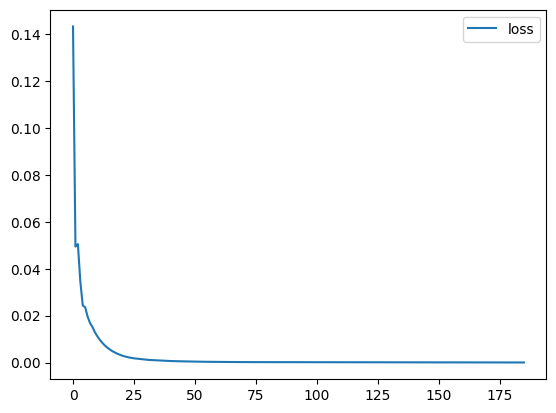

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

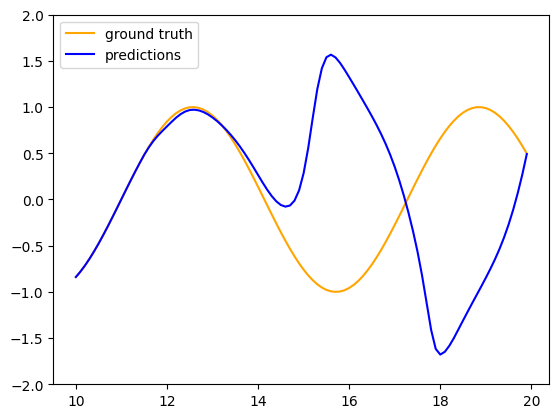

In [11]:
# RNN 입력 벡터 크기 맞추기 위해 벡터 차원크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print('train_x.shape = {}'.format(train_x.shape))
print('train_y.shape = {}'.format(train_y.shape))

# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(units = 10, return_sequences =False, input_shape = (n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor= 'loss', patience = 5, mode = 'auto')
history = model.fit(train_x, train_y, epochs = 1000, callbacks = [early_stopping])

# loss 그래프 생성
plt.plot(history.history['loss'], label = 'loss')
plt.legend(loc = 'upper right')
plt.show()

# 테스트 데이터셋 생성
test_x = np.arange(10,20,0.1)
calc_y = np.cos(test_x)   # 테스트 정답 데이터

# RNN 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i:i+n_timesteps]
    net_input = net_input.reshape((1,n_timesteps, n_features))
    train_y = model.predict(net_input, verbose = 0)
    print(test_y.shape, train_y.shape, i, i+n_timesteps)
    test_y = np.append(test_y, train_y)

# 예측결과 그래프 그리기
plt.plot(test_x, calc_y, label = 'ground truth', color = 'orange')
plt.plot(test_x, test_y, label = 'predictions', color = 'blue')
plt.legend(loc = 'upper left')
plt.ylim(-2,2)
plt.show()

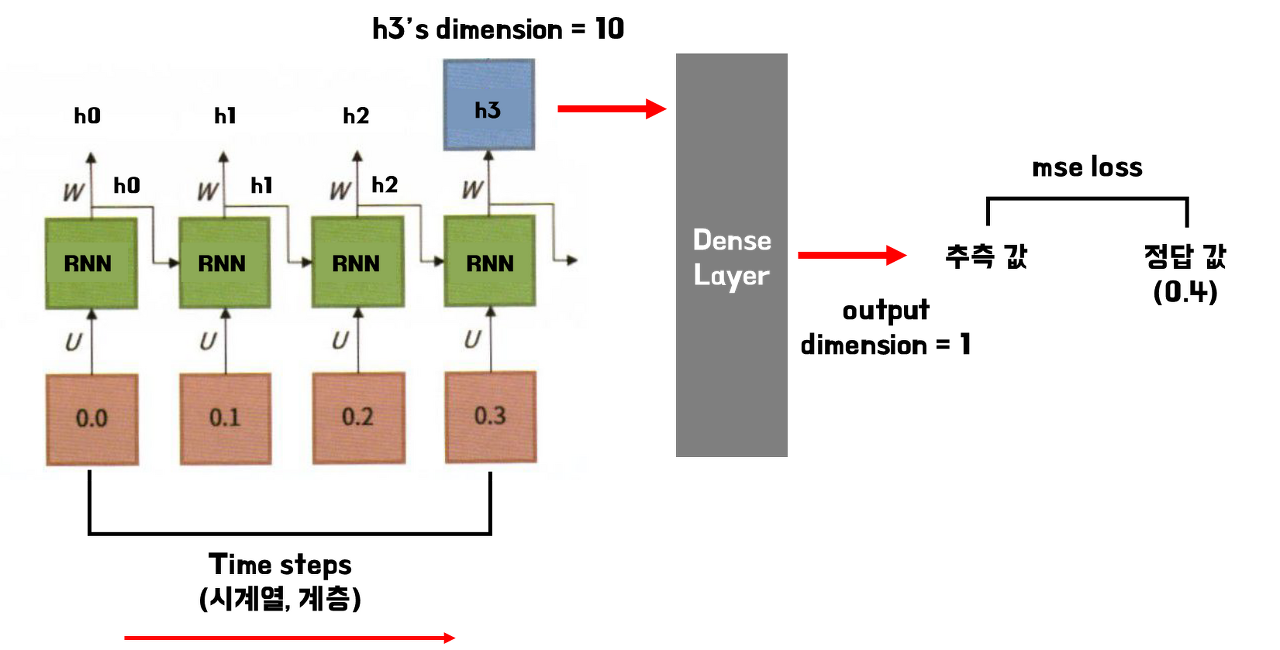

In [9]:
Image('Data/230628/23.png')

### LSTM

- 앞서 살펴본 RNN 모델은 입력 시퀀스의 시점이 길어질수록 앞쪽의 데이터가 뒤쪽으로 잘 전달되지 않아 학습능력이 떨어짐

- 또한 RNN을 다층 구조로 쌓으면 입력과 출력 데이터 사이의 연관 관계가 줄어들어 장기 의존성 문제가 생김

- 이런 문제를 보완하기 위해 기존 RNN을 변형해 LSTM이 개발되었음

- LSTM은 은닉 상탯값과 셀 상탯값을 계산하기 위한 3개의 게이트가 추가됨
    - 입력게이트Input Gate, 삭제 게이트Forget Gate, 출력 게이트Output Gate로 구성

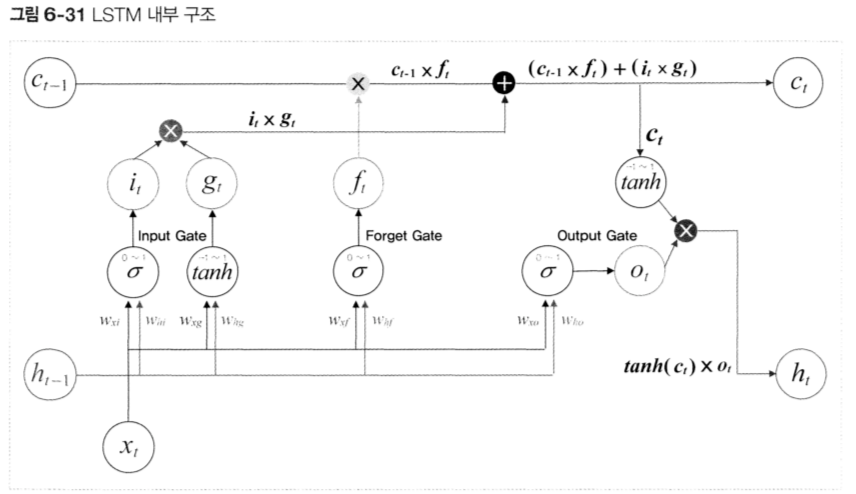

In [6]:
Image('Data/230628/0.png')

#### 1) 입력 게이트 Input Gate $i_t$
- 현재 정보를 기억하기 위한 게이트
- 시그모이드 함수를 지나 0과 1사이의 값을 가지는 $i_t$ 과 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값을 가지는 $g_t$. 이 두 개의 값을 가지고 이번에 선택된 기억할 정보의 양을 정하는데, 구체적으로 어떻게 결정하는지는 아래에서 배우게 될 셀 상태 수식을 참고

$$ i_t = sigmoid(W_{xi}x_t + W_{hi}h_{t-1} + b_i) $$
$$ g_t = tanh(W_{xg}x_t + W_{hg}h_{t-1} + b_g) $$

#### 2) 삭제 게이트 Forget Gate $f_t$

- 기억을 삭제하기 위한 게이트
- 시그모이드 함수를 지나면 0과 1 사이의 값이 나옴: 이 값이 곧 삭제 과정을 거친 정보의 양
    - 0에 가까울수록 정보가 많이 삭제된 것이고 
    - 1에 가까울수록 정보를 온전히 기억한 것

$$ f_t = sigmoid(W_{xf}x_t + W_{hf}h_{t-1} + b_f) $$

#### 3) 셀 상태
- 삭제 게이트에서 일부 기억을 잃은 상태

$$ C_t = f_t\circ C_{t-1} + i_t \circ g_t $$  
$ \circ$ : 같은 위치의 성분끼리 곱하는 것

- 만약 삭제 게이트의 출력값인 $f_t$가 0이 된다면, 이전 시점의 셀 상태의 값인 $C_{t-1}$은 현재 시점의 셀 상태의 값을 결정하기 위한 영향력이 0이 되면서, 오직 입력 게이트의 결과만이 현재 시점의 셀 상태의 값 $C_t$을 결정할 수 있음. 이는 삭제 게이트가 완전히 닫히고 입력 게이트를 연 상태를 의미
- 반대로 입력 게이트의 값$i_t$을 0이라고 한다면, 현재 시점의 셀 상태의 값$C_t$는 오직 이전 시점의 셀 상태의 값 $C_{t-1}$의 값에만 의존함. 이는 입력 게이트를 완전히 닫고 삭제 게이트만을 연 상태를 의미

- 결과적으로 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정함

### [예제6] LSTM 

shape x:(185, 15) / y:(185,)
train_x.shape = (185, 15, 1)
train_y.shape = (185,)
Epoch 1/1000
6/6 [==============================] - 1s 4ms/step - loss: 0.4801
Epoch 2/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.4298
Epoch 3/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3829
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.3354
Epoch 5/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2961
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2600
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2266
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1990
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1766
Epoch 10/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1606
Epoch 11/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.1490
Epoch 12/1000
6/6 [=============================

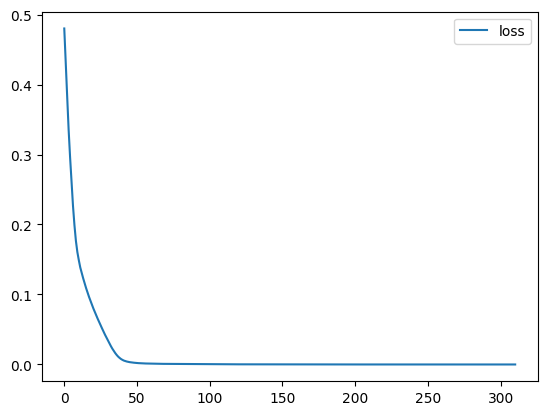

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

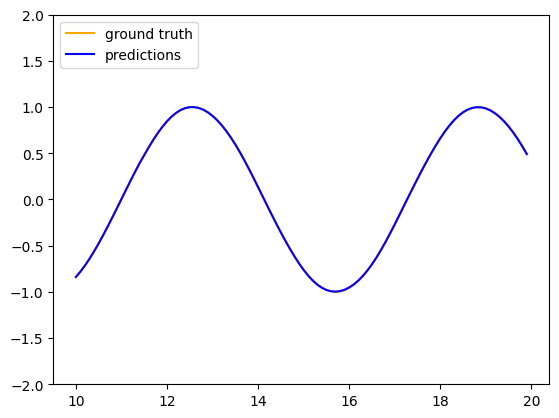

In [8]:
# sin함수 학습 데이터
x = [i for i in np.arange(start = -10, stop = 10, step = 0.1)]
train_y = [np.sin(i) for i in x]

# 하이퍼파라미터
n_timesteps = 15
n_features = 1

# 시퀀스 나누기
train_x, train_y = split_sequence(train_y, step = n_timesteps)  # def split_sequence함수 활용
print("shape x:{} / y:{}".format(train_x.shape, train_y.shape))

# LSTM 입력 벡터 크기 맞추기 위해 벡터 차원크기 변경
# reshape from [samples, timesteps] into [samples, timesteps, features]
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], n_features)
print('train_x.shape = {}'.format(train_x.shape))
print('train_y.shape = {}'.format(train_y.shape))

# LSTM 모델 정의
model = Sequential()
model.add(LSTM(units = 10, return_sequences =False, input_shape = (n_timesteps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

# 모델 학습
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor= 'loss', patience = 5, mode = 'auto')
history = model.fit(train_x, train_y, epochs = 1000, callbacks = [early_stopping])

# loss 그래프 생성
plt.plot(history.history['loss'], label = 'loss')
plt.legend(loc = 'upper right')
plt.show()

# 테스트 데이터셋 생성
test_x = np.arange(10,20,0.1)
calc_y = np.cos(test_x)   # 테스트 정답 데이터

# LSTM 모델 예측 및 로그 저장
test_y = calc_y[:n_timesteps]
for i in range(len(test_x) - n_timesteps):
    net_input = test_y[i:i+n_timesteps]
    net_input = net_input.reshape((1,n_timesteps, n_features))
    train_y = model.predict(net_input, verbose = 0)
    print(test_y.shape, train_y.shape, i, i+n_timesteps)
    test_y = np.append(test_y, train_y)

# 예측결과 그래프 그리기
plt.plot(test_x, calc_y, label = 'ground truth', color = 'orange')
plt.plot(test_x, test_y, label = 'predictions', color = 'blue')
plt.legend(loc = 'upper left')
plt.ylim(-2,2)
plt.show()

#### 옵티마이저

① SGD (Stochastic Gradient Descent; 확률적 경사하강법)
<br> SGD는 전체 입력 데이터로 가중치와 편향이 업데이트하는 것이 아닌, 일부 데이터만 이용함. 학습 속도를 빠르게 할 수 있을 뿐만 아니라 메모리도 절약함

② adam(Adaptive Moment Estimation)
<br> Adagrad나 RMSProp처럼 각 파라미터마다 다른 크기의 업데이트를 진행하는 방법임. 계산 비용이 과대인 단점

③ rmsprop
<br> Adagrad 옵티마이저가 학습진행 시에 Gt 값이 무한히 커지는 단점을 해결하기 위해서 지수 이동평균(exponentially weighted moving average)를 이용함

### 양방향 LSTM

- RNN이나 LSTM은 일반 신경망과 다르게 시퀀스 또는 시계열 데이터 처리에 특화됨. 이 특징 때문에 은닉층에서 과거의 정보를 기억할 수 있음
- 그러나 순환 신경망의 구조적 특성상 데이터가 입력 순으로 처리되기 때문에 이전 시점의 정보만 활용할 수밖에 없는 단점이 존재함. 예를 들어 문장이 길어질수록 성능이 저하됨 

- 자연어 처리에 있어 입력 데이터의 정방향 처리만큼 역방향 처리도 중요함. 양방향 LSTM은 기존 LSTM 계층에 역방향으로 처리하는 LSTM 계층을 하나 더 추가해 양방향에서 문장의 패턴을 분석할 수 있도록 구성됨

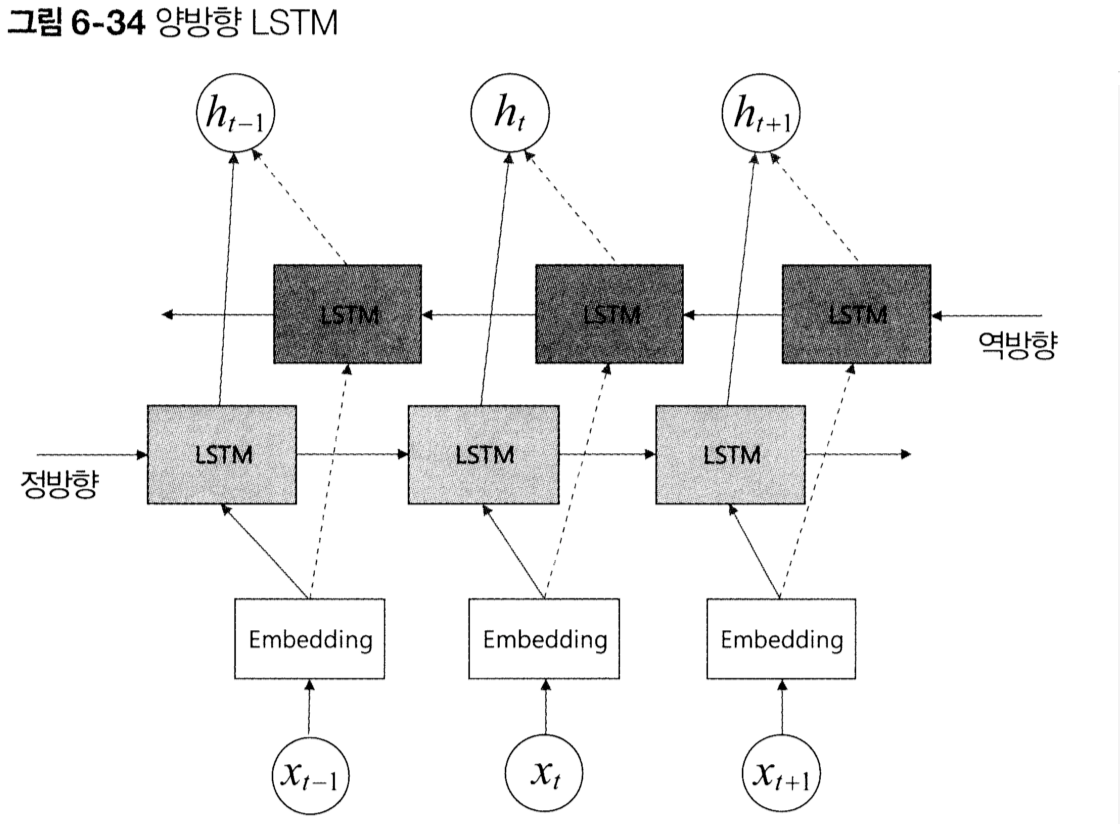

In [17]:
Image('Data/230628/26.png', width = 600)

### [예제7] 양방향 LSTM

In [10]:
# 시퀀스 생성
def get_sequence(n_timesteps):
    # 0~1 사이 랜덤 시퀀스 생성
    x = np.array([random() for _ in range(n_timesteps)])

    # 클래스 분류 기준
    limit = n_timesteps / 4.0

    # 누적합 시퀀스에서 클래스 결정: 누적합 항목이 limit보다 작으면 0, 아니면 1
    y = np.array([0 if a < limit else 1 for a in np.cumsum(x)])

    # LSTM 입력 위해 3차원 텐서 형태로 변경
    x = x.reshape(1, n_timesteps, 1)
    y = y.reshape(1, n_timesteps, 1)
    return x, y

# 하이퍼파라미터
n_units = 20
n_timesteps = 4

#### Bidirectional LSTM 모델 정의

- Bidirectional 래버(wrapper) 사용

- return_sequences = True 인자를 반드시 True로 함. 양방향 계층에 모든 출력값 연결

- Dense 계층은 TimeDistributed 래퍼를 사용해 3차원 텐서를 입력받도록 확장

In [11]:
# 양방향 LSTM 모델 정의
model = Sequential()
model.add(Bidirectional(LSTM(n_units, return_sequences = True, input_shape = (n_timesteps, 1))))
model.add(TimeDistributed(Dense(1, activation = 'sigmoid')))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [12]:
# 모델 학습
# 에포크를 1, 배치를 1로 설정하고 여러번 호출 가능
for epoch in range(1000):
    x, y = get_sequence(n_timesteps)
    model.fit(x, y, epochs = 1, batch_size = 1, verbose = 2)

# 모델 평가
x, y = get_sequence(n_timesteps)
yhat = (model.predict(x, verbose = 0) > 0.5).astype('int32')
for i in range(n_timesteps):
    print('실젯값: ', y[0, i], '예측값: ', yhat[0, i])

1/1 - 2s - loss: 0.7182 - accuracy: 0.2500 - 2s/epoch - 2s/step
1/1 - 0s - loss: 0.6904 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.7123 - accuracy: 0.2500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.7081 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6704 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6724 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6611 - accuracy: 0.7500 - 3ms/epoch - 3ms/step
1/1 - 0s - loss: 0.6927 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.7042 - accuracy: 0.2500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6667 - accuracy: 0.7500 - 3ms/epoch - 3ms/step
1/1 - 0s - loss: 0.6602 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6866 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6610 - accuracy: 0.7500 - 4ms/epoch - 4ms/step
1/1 - 0s - loss: 0.6547 - accuracy: 0.7500 - 3ms/epoch - 3ms/step
1/1 - 0s - loss: 0.6818 - accuracy: 0.5000 - 4ms/epoch - 4ms/step
1/1 - 0s

In [13]:
# 에포크마다 학습데이터 생성해 학습, 학습데이터를 배치사이즈에 맞게 생성해 fit()해도 됨
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor= 'loss', patience = 5, mode = 'auto')
x, y = get_sequence(n_timesteps)
model.fit(x, y, epochs = 1000, callbacks = [early_stopping], batch_size = 1, verbose = 2)

# 모델 평가
x, y = get_sequence(n_timesteps)
yhat = (model.predict(x, verbose = 0) > 0.5).astype('int32')
for i in range(n_timesteps):
    print('실젯값: ', y[0, i], '예측값: ', yhat[0, i])

Epoch 1/1000
1/1 - 0s - loss: 0.1642 - accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 2/1000
1/1 - 0s - loss: 0.1631 - accuracy: 1.0000 - 5ms/epoch - 5ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.1617 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.1600 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.1580 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.1558 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.1535 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.1511 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.1485 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.1459 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.1432 - accuracy: 1.0000 - 4ms/epoch - 4ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.1405 - accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 13/1000
1/1 - 0s - loss: 0.1377 - accuracy: